In [2]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

### 广义线性模型举例

In [4]:
# 数据集特征
np.random.seed(24)
x = np.linspace(0, 4, 20).reshape(-1, 1)
x = np.concatenate((x, np.ones_like(x)), axis=1)
x

array([0.        , 0.21052632, 0.42105263, 0.63157895, 0.84210526,
       1.05263158, 1.26315789, 1.47368421, 1.68421053, 1.89473684,
       2.10526316, 2.31578947, 2.52631579, 2.73684211, 2.94736842,
       3.15789474, 3.36842105, 3.57894737, 3.78947368, 4.        ])

In [ ]:
# 数据集标签
y = np.exp(x[:, 0] + 1).reshape(-1, 1)
y

array([[  2.71828183],
       [  3.35525011],
       [  4.1414776 ],
       [  5.11193983],
       [  6.30980809],
       [  7.78836987],
       [  9.61339939],
       [ 11.86608357],
       [ 14.64663368],
       [ 18.07874325],
       [ 22.31509059],
       [ 27.54413077],
       [ 33.99847904],
       [ 41.96525883],
       [ 51.79887449],
       [ 63.93677707],
       [ 78.91892444],
       [ 97.41180148],
       [120.23806881],
       [148.4131591 ]])

In [ ]:
w_hat = np.linalg.lstsq(x, y, rcond=-1)[0]
w_hat

array([[ 30.44214742],
       [-22.37576724]])

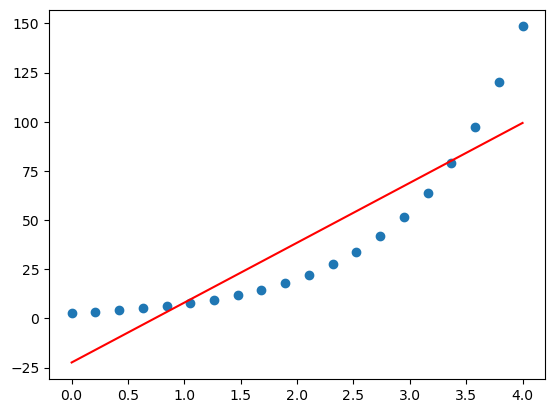

In [ ]:
yhat = x[:, 0] * 30.44 - 22.38
# 观察模型预测和真实结果
plt.plot(x[:, 0], y, 'o')
plt.plot(x[:, 0], yhat, 'r-')

In [ ]:
w_hat = np.linalg.lstsq(x, np.log(y), rcond=-1)[0]
w_hat

array([[1.],
       [1.]])

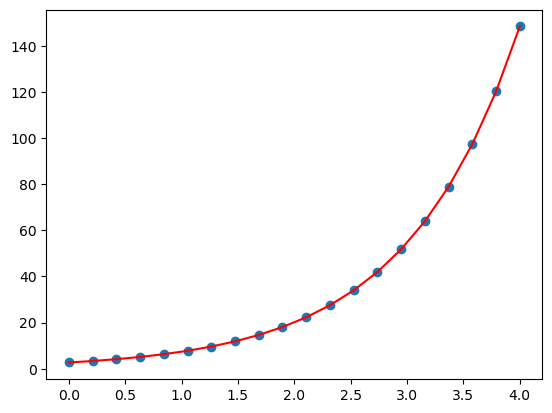

In [ ]:
lnyhat = x[:, 0] + 1
# 观察模型预测和真实结果
plt.plot(x[:, 0], y, 'o')
plt.plot(x[:, 0], np.exp(lnyhat), 'r-')

### 逻辑回归函数

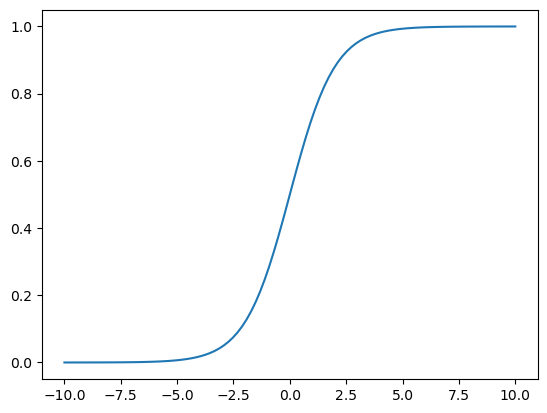

In [ ]:
np.random.seed(24)
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)

In [ ]:
def sigmoid(x):
    return (1 / (1 + np.exp(x-1)))

In [ ]:
x = np.array([2, 0.5]).reshape(-1, 1)
sigmoid(x)

array([[0.26894142],
       [0.62245933]])

In [ ]:
yhat = sigmoid(x)                 # 模型预测结果
ycla = np.zeros_like(yhat)        # 类别判别结果
thr = 0.5                         # 设置阈值
ycla[yhat >= thr] = 1             # 布尔索引
ycla

array([[0.],
       [1.]])

### 多分类策略MvM

In [ ]:
def dist(x, y, cat = 2):
    """
    闵可夫斯基距离计算函数
    """
    d1 = np.abs(x - y)
    if x.ndim > 1 or y.ndim > 1:
        res1 = np.power(d1, cat).sum(axis = 1)
    else:
        res1 = np.power(d1, cat).sum()
    res = np.power(res1, 1/cat)
    return res

In [ ]:
x = np.array([1, 2])
y = np.array([2, 3])

print(dist(x, y))
print(np.sqrt(2))

1.4142135623730951
1.4142135623730951


In [ ]:
# 原类别编码矩阵
code_mat = np.array([[1, -1, 1, -1],
                    [-1, -1, 1, -1],
                    [-1, -1, -1, 1],
                    [-1, 1, -1, 1]])

# 预测数据编码
data_code = np.array([1, -1, 1, 1])


dist(code_mat, data_code)

array([2.        , 2.82842712, 2.82842712, 3.46410162])